# Rough Volatility - Monte Carlo Project

In [249]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import math
from scipy.stats import norm
from random import gauss
import scipy.special as sc
from scipy import optimize

In [625]:
T= 1 
n=312
alpha= -0.43
lambda_=1
zeta=0.235**2
rho=-0.9
eta=1.9
TT=np.linspace(0, T, n*T+1)[np.newaxis,:] 

In [626]:
def Voltera_cov(u,v):
    if (u==v):
        return u**(2*alpha+1)
    return pow(min(v,u),2.*alpha+1)*((2.*alpha+1)/(alpha+1))*pow(min(u,v)/max(u,v),-alpha)*sc.hyp2f1(1, -alpha, 2+alpha, min(u,v)/max(u,v))

In [627]:
def Voltera_cov_2(u,v):
    if (u==v):
        return u**(2.*alpha+1)
    if (v>u):
        return pow(u,2.*alpha+1)*((2.*alpha+1)/(alpha+1))*pow(u/v,-alpha)*sc.hyp2f1(1, -alpha, 2+alpha, u/v)
    else :
        return pow(v,2.*alpha+1)*((2.*alpha+1)/(alpha+1))*pow(v/u,-alpha)*sc.hyp2f1(1, -alpha, 2+alpha, v/u)

In [628]:
def Brownian_cov(u,v):
    return min(u,v)

def Brownian_Voltera_cov(u,v):
    return rho*(np.sqrt(2.*alpha+1)/(alpha +1))*(pow(v,alpha+1)-pow((v-(min(v,u))),alpha+1))


In [629]:
def Chol_cov(i,j):
    return np.array([[Voltera_cov(i,j),Brownian_Voltera_cov(i,j)],[Brownian_Voltera_cov(j,i), Brownian_cov(i,j)]])

In [630]:
M=np.zeros((n,n,2,2))
for i in range(n):
    for j in range(i,n):
        s=(i+1)/(n*T)
        t=(j+1)/(n*T)
        M[i,j]=Chol_cov(s,t)
        M[j,i]=M[i,j]

In [631]:
#print(M)
#M.all()==M.T.all()
#np.linalg.eigvals(M)

In [632]:
M=M.swapaxes(2,1).reshape(M.shape[0] * M.shape[2],-1)

In [633]:
M.shape

(624, 624)

In [634]:
Chol=np.linalg.cholesky(M)
Chol.shape # Taille (2*n)*(2*n)
#Chol


In [635]:
def cholesky_(X,covmat):
    L = np.linalg.cholesky(covmat)
    matrix_chol= (L)@X
    return (matrix_chol)


In [636]:
L=cholesky_(X,M)
L.shape

(624, 1)

In [637]:
A=np.zeros(n)
B=np.zeros(n)
for i in range(n):
    A[i]=L[2*i]
    B[i]=L[2*i+1]

In [638]:
A=np.insert(A,0,0)
B=np.insert(B,0,0)

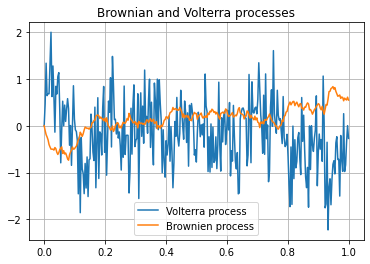

In [639]:
x = np.linspace(0, T,T*n+1)
plt.plot(x, A, label="Volterra process")
plt.plot(x, B, label="Brownien process")
plt.title("Brownian and Volterra processes")
plt.grid(True)
plt.legend()

plt.show()

In [640]:
#plt.plot(B)

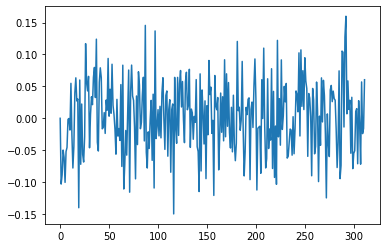

In [655]:
plt.plot(J)

In [656]:
def V_cholesky(Y, alpha_, zeta, eta,T):
    V_ = zeta * np.exp(eta * Y - 0.5 * pow(eta,2) * pow(T,2 * alpha_ + 1))
    return V_

In [657]:
V_chol=V_cholesky(A, alpha, zeta, eta, T)

In [658]:
V_chol.shape

(313,)

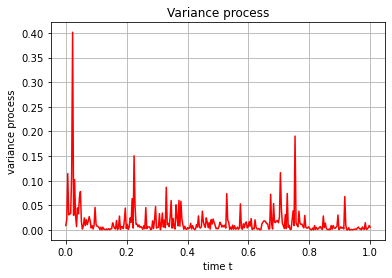

In [659]:
plt.plot(x,V_chol,"r")
plt.title("Variance process")
plt.xlabel("time t")
plt.ylabel("variance process")
plt.grid(True)
plt.show()

In [660]:
J.shape

(312,)

In [661]:
S__=np.sqrt(V_chol[:-1])*J - 0.5*V_chol[:-1]*1./n
S__[:10]


array([-1.45562530e-05, -1.52842297e-02, -3.00981378e-02, -8.76403018e-03,
       -1.12185344e-02, -1.83142476e-02, -1.75029605e-02, -2.95136228e-02,
       -3.28740047e-04, -2.66233728e-04])

In [662]:
integral_ = np.cumsum(S__) 
integral_[:10]

array([-1.45562530e-05, -1.52987859e-02, -4.53969237e-02, -5.41609539e-02,
       -6.53794884e-02, -8.36937360e-02, -1.01196696e-01, -1.30710319e-01,
       -1.31039059e-01, -1.31305293e-01])

In [663]:
def S_cholesky_(V,dB,n,S0=1):
    S_=np.sqrt(V)*dB - 0.5*V*1./n
    integral = np.cumsum(S_,axis=0) 
    S = np.zeros((n*T+1))
    S[0] = S0
    S[1:] = S0 * np.exp(integral)
    return S

In [664]:
S_cholesky=S_cholesky_(V_chol[:-1],J,n,S0=1)
S_cholesky_B=S_cholesky_(V_chol[:-1],dB_[1],n,S0=1)#S_cholesky_(V_chol[:-1],dB_[1],n,S0=1)
S_cholesky.shape

(313,)

([<matplotlib.lines.Line2D at 0x7fde1bdb40d0>],)

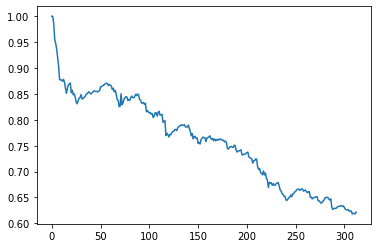

In [665]:
plt.plot(S_cholesky), #plt.plot(S_cholesky_B)

In [615]:
def bs_call(S, K, V):
    d1 = np.log(S/K) / np.sqrt(V) + 0.5 * np.sqrt(V)
    d2 = d1 - np.sqrt(V)
    P = S * norm.cdf(d1) - K *norm.cdf(d2)
    return P

In [616]:
def call_payoff(S,K):
    return np.maximum(S-K,0.)

In [617]:
k = np.arange(-0.5, 0.51,(0.51+0.5)/(n*T))
#k.shape, S_.shape
K = np.exp(k)[np.newaxis,:]

In [618]:
Call_payoffs_2=call_payoff(S_cholesky[:-1][:,np.newaxis],K)   
Call_prices_2=np.mean(Call_payoffs_2, axis=0)[:,np.newaxis]


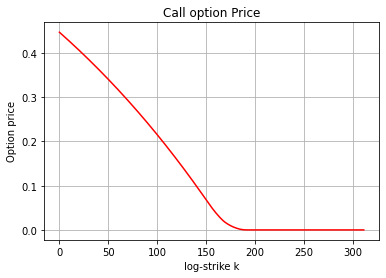

In [619]:
plt.plot(Call_prices_2,"r")
plt.title("Call option Price")
plt.xlabel("log-strike k")
plt.ylabel("Option price")
plt.grid(True)
plt.show()


In [620]:
def bsinv(P, S, K, T):
    P = np.maximum(P, np.maximum((S - K), 0.))
    
    def error(sigma):
        return bs_call(S, K, pow(sigma,2)*T) - P

    #s = optimize.newton(error,x0=0.25,tol=10**(-6))
    s = optimize.brentq(error, 1e-9, 1e9)
    return s

vec_bsinv = np.vectorize(bsinv)
vol_implied = vec_bsinv(Call_prices_2, 1., K.T,T)

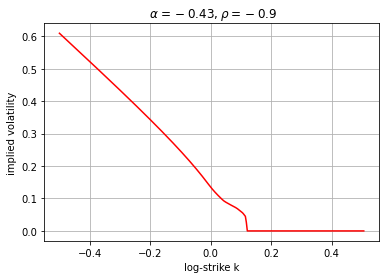

In [621]:
    
plt.plot(k,vol_implied,"r")
plt.title( r' $\alpha=-0.43,\rho=-0.9$')
plt.xlabel("log-strike k")
plt.ylabel("implied volatility")
plt.grid(True)
plt.show()
    

In [389]:
N=312 #pas de discrétisation
N_=10000 #nb de simulation
T= 1

#-1e-5#
rho=-0.9
alpha=-0.43
TT=np.linspace(0, T, N*T+1)[np.newaxis,:] 
lambda_=1.
zeta=0.235**2
eta=1.9

## Hybrid scheme and algorithm 

In [390]:
def kernel_g(x, a):
    return x**a

def b_opti(k, a):
    return pow((pow(k,a+1)-pow(k-1,a+1))/(a+1),1./a)

def cov(alpha, n):
    cov = np.array([[0.,0.],[0.,0.]])
    cov[0,0] = 1./n
    cov[0,1] = 1./((alpha+1) * pow(n,alpha+1))
    cov[1,1] = 1./((2.*alpha+1) * pow(n,2.*alpha+1))
    cov[1,0] = cov[0,1]
    return cov

def call_payoff(S,K):
    return np.maximum(S-K,0.)

def bs_call(S, K, V):
    d1 = np.log(S/K) / np.sqrt(V) + 0.5 * np.sqrt(V)
    d2 = d1 - np.sqrt(V)
    P = S * norm.cdf(d1) - K *norm.cdf(d2)
    return P

mean= np.array([0.,0.])
Sigma=cov(alpha,N)

In [391]:
def dW():
    return np.random.multivariate_normal(mean, Sigma, (N_,N*T)) 

Y_1 = np.zeros((N_, 1 + N*T)) # integrale stocastique 
dW_=dW()
dW1 = dW_[:,:,1] 

for i in np.arange(1, 1 + N*T, 1):
        Y_1[:,i] = dW1[:,i-1] 

dW0 = dW_[:,:,0] 
dW0.shape

G_bk = np.zeros(1 + N*T)
for k in np.arange(2, 1 + N*T, 1):
    G_bk[k] = kernel_g(b_opti(k, alpha)/N, alpha)

Y_2 = np.zeros((N_, 1 + N*T))
Convolve_=np.zeros((N_, 2*N*T)) 

for k in range(N_):
    Convolve_[k,:]=np.convolve(G_bk,dW0[k,:])
    
Y_2 = Convolve_[:,:1 + N*T] #on en garde que pour i=0,...,N*T 
Y = np.sqrt(2. * alpha + 1) * (Y_1 + Y_2)

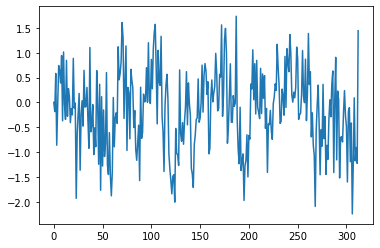

In [392]:
plt.plot(Y[1,:])

In [475]:
def dW_ortho():
    return np.random.randn(N_, N*T) * np.sqrt(1./N)

def dB(dW_, dW2, rho):
        #dB_ = rho * dW_[:,:,0] + np.sqrt(1 - rho**2) * dW2
        dB_ = rho * dW_ + np.sqrt(1 - rho**2) * dW2
        return dB_
    
#dB_=dB(dW(),dW_ortho(),rho)
dB_=dB(dW0,dW_ortho(),rho)

In [394]:
def V(Y, alpha_, zeta, eta,T):
    V_ = zeta * np.exp(eta * Y - 0.5 * pow(eta,2) * pow(T,2 * alpha_ + 1))
    return V_

V_=V(Y, alpha, zeta, eta, TT)

In [395]:
S__=np.sqrt(V_[:,:-1])*dB_ - 0.5*V_[:,:-1]*1./N
S__[1,:10]

array([ 0.01786572, -0.00146367,  0.00968343, -0.00393253, -0.01161145,
       -0.02536743,  0.00063203,  0.01389486, -0.00984378, -0.01036869])

In [396]:
integral = np.cumsum(S__, axis = 1)
integral[1,:10]

array([ 0.01786572,  0.01640206,  0.02608549,  0.02215296,  0.01054151,
       -0.01482592, -0.01419389, -0.00029903, -0.01014281, -0.02051149])

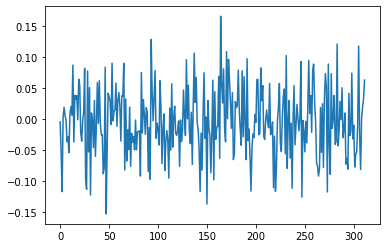

In [474]:
plt.plot(dB_[1])

In [398]:
def S(V,dB,S0=1):
    S_=np.sqrt(V[:,:-1])*dB - 0.5*V[:,:-1]*1./N
    integral = np.cumsum(S_, axis = 1) # sum over N*T columns for each of the N_ rows
    S = np.zeros((N_,N*T+1))
    S[:,0] = S0
    S[:,1:] = S0 * np.exp(integral)
    return S

S_=S(V_,dB_)
#np.mean(S_)

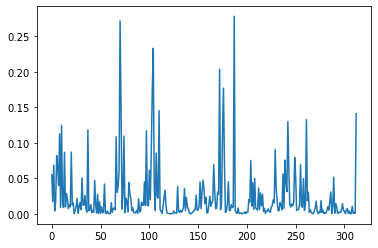

In [399]:
plt.plot(V_[1,:])

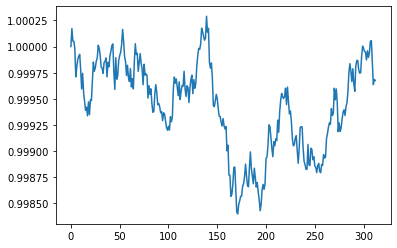

In [465]:
plt.plot(np.mean(S_, axis=0))

### Calcul du prix du Call

In [401]:
k = np.arange(-0.5, 0.51, 0.01)#(0.51+0.5)/(N_*T))
#k.shape, S_.shape
K = np.exp(k)[np.newaxis,:]

Call_payoffs_2=call_payoff(S_[:,-1][:,np.newaxis],K)   
Call_prices_2=np.mean(Call_payoffs_2, axis=0)[:,np.newaxis]

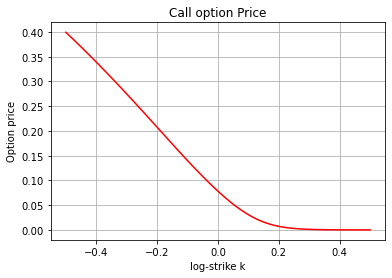

In [402]:
plt.plot(k,Call_prices_2,"r")
plt.title("Call option Price")
plt.xlabel("log-strike k")
plt.ylabel("Option price")
plt.grid(True)
plt.show()


In [403]:
#S_[:,-1][:,np.newaxis].shape,K[np.newaxis,:].shape, Call_prices_2.shape

In [404]:
from scipy import optimize

def bsinv(P, S, K, T):
    
    P = np.maximum(P, np.maximum((S - K), 0.))
    
    def error(sigma):
        return bs_call(S, K, pow(sigma,2)*T) - P

    #s = optimize.newton(error,x0=0.25,tol=10**(-6))
    s = optimize.brentq(error, 1e-9, 1e9)
    return s

vec_bsinv = np.vectorize(bsinv)
vol_implied = vec_bsinv(Call_prices_2, 1., K.T,T)

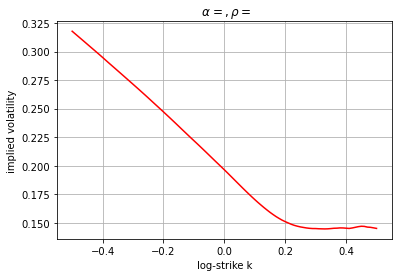

In [405]:
plt.plot(k,vol_implied,"r")
plt.title( r' $\alpha=,\rho=$')
plt.xlabel("log-strike k")
plt.ylabel("implied volatility")
plt.grid(True)
plt.show()

In [ ]:
N=312 #pas de discrétisation
N_=10000 #nb de simulation
T= 1

#-1e-5#
rho=-1e-5#-0.9
alpha=-1e-5#-0.43
TT=np.linspace(0, T, N*T+1)[np.newaxis,:] 
lambda_=1.
zeta=0.235**2
eta=1.9

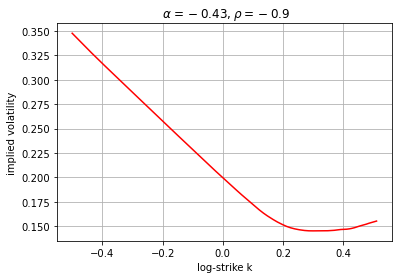

In [624]:
def implied_vol(N=312,N_=10000,T= 1,rho=-0.9,alpha=-0.43,lambda_=1.,zeta=0.235**2,eta=1.9):
    TT=np.linspace(0, T, N*T+1)[np.newaxis,:] 
    
    ################## Function #################
    def kernel_g(x, a):
        return x**a

    def b_opti(k, a):
        return pow((pow(k,a+1)-pow(k-1,a+1))/(a+1),1./a)

    def cov(alpha, n):
        cov = np.array([[0.,0.],[0.,0.]])
        cov[0,0] = 1./n
        cov[0,1] = 1./((alpha+1) * pow(n,alpha+1))
        cov[1,1] = 1./((2.*alpha+1) * pow(n,2.*alpha+1))
        cov[1,0] = cov[0,1]
        return cov

    def call_payoff(S,K):
        return np.maximum(S-K,0.)

    def bs_call(S, K, V):
        d1 = np.log(S/K) / np.sqrt(V) + 0.5 * np.sqrt(V)
        d2 = d1 - np.sqrt(V)
        P = S * norm.cdf(d1) - K *norm.cdf(d2)
        return P

    mean= np.array([0.,0.])
    Sigma=cov(alpha,N)
    
    def dW():
        return np.random.multivariate_normal(mean, Sigma, (N_,N*T)) 

    Y_1 = np.zeros((N_, 1 + N*T)) # integrale stocastique 
    dW_=dW()
    dW1 = dW_[:,:,1] 

    for i in np.arange(1, 1 + N*T, 1):
            Y_1[:,i] = dW1[:,i-1] 

    dW0 = dW_[:,:,0] 
    dW0.shape

    G_bk = np.zeros(1 + N*T)
    for k in np.arange(2, 1 + N*T, 1):
        G_bk[k] = kernel_g(b_opti(k, alpha)/N, alpha)

    Y_2 = np.zeros((N_, 1 + N*T))
    Convolve_=np.zeros((N_, 2*N*T)) 

    for k in range(N_):
        Convolve_[k,:]=np.convolve(G_bk,dW0[k,:])
    
    Y_2 = Convolve_[:,:1 + N*T] #on en garde que pour i=0,...,N*T 
    Y = np.sqrt(2. * alpha + 1) * (Y_1 + Y_2)
    
    def dW_ortho():
        return np.random.randn(N_, N*T) * np.sqrt(1./N)

    def dB(dW_, dW2, rho):
        #dB_ = rho * dW_[:,:,0] + np.sqrt(1 - rho**2) * dW2
        dB_ = rho * dW_ + np.sqrt(1 - rho**2) * dW2
        return dB_
    
    #dB_=dB(dW(),dW_ortho(),rho)
    dB_=dB(dW0,dW_ortho(),rho)
    
    
    def V(Y, alpha_, zeta, eta,T):
        V_ = zeta * np.exp(eta * Y - 0.5 * pow(eta,2) * pow(T,2 * alpha_ + 1))
        return V_

    V_=V(Y, alpha, zeta, eta, TT)

    def S(V,dB,S0=1):
        S_=np.sqrt(V[:,:-1])*dB - 0.5*V[:,:-1]*1./N
        integral = np.cumsum(S_, axis = 1) # sum over N*T columns for each of the N_ rows
        S = np.zeros((N_,N*T+1))
        S[:,0] = S0
        S[:,1:] = S0 * np.exp(integral)
        return S

    S_=S(V_,dB_)
    
    k = np.arange(-0.5, 0.51,(0.51+0.5)/(N_*T))
    #k.shape, S_.shape
    K = np.exp(k)[np.newaxis,:]

    Call_payoffs_2=call_payoff(S_[:,-1][:,np.newaxis],K)   
    Call_prices_2=np.mean(Call_payoffs_2, axis=0)[:,np.newaxis]
    
    def bsinv(P, S, K, T):
    
        P = np.maximum(P, np.maximum((S - K), 0.))
    
        def error(sigma):
            return bs_call(S, K, pow(sigma,2)*T) - P

        #s = optimize.newton(error,x0=0.25,tol=10**(-6))
        s = optimize.brentq(error, 1e-9, 1e9)
        return s

    vec_bsinv = np.vectorize(bsinv)
    vol_implied = vec_bsinv(Call_prices_2, 1., K.T,T)
    
    
    plt.plot(k,vol_implied,"r")
    plt.title( r' $\alpha=-0.43,\rho=-0.9$')
    plt.xlabel("log-strike k")
    plt.ylabel("implied volatility")
    plt.grid(True)
    plt.show()
    
    
    #return Y,V_,S_,Call_prices_2,vol_implied
    
    
    
implied_vol()
    